# Sentiment Analysis and Exploratory Data Analysis

In [1]:
# libraries
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from gensim.parsing.preprocessing import STOPWORDS
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [2]:
# Working directory
os.chdir('/Users/aymanomar/CRL/Pickle_files')

# loading last clean dataset and dtm
tweet_df_cleanR3 = pd.read_pickle('tweet_df_cleanR3.pkl')
dtm1 = pd.read_pickle('dtm1.pkl')

# loading custom_stop_words
with open('custom_stop_words.pkl','rb') as custom_stop_words_pkl:
    custom_stop_words = pickle.load(custom_stop_words_pkl)
    
# transposing dtm
dtm1 = dtm1.transpose()

In [3]:
dtm1

,0,1,2,3,4,5,6,7,8,9,...,847,848,849,850,851,852,853,854,855,856
able,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abuse,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
access,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.257935,0.0,0.0,0.0,0.0,0.0,0.158752,0.0,0.0,0.0
accessed,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
according,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
years,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
youre,0.0,0.220146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
youve,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
zaya,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [4]:
tweet_df_cleanR3

,author,description
0,ECAatState,today officially marks cyber security awarenes...
1,JuliePerrine,creating strong passwords crucial cyber securi...
2,craziart,the importance smaller steps security awarenes...
3,CyberSecurityN8,true owner gives maximum protection registered...
5,R___83___O,want know consequences ransom ware attack busi...
...,...,...
2489,security_hq,if havent already register think summit middle...
2490,botcybersec,fraud scammer obtains access sim card carrying...
2494,cybersec_feeds,someone hacked us warship facebook account str...
2495,FortifySolutio1,if password characters less second half lm has...


In [5]:
# finding the top 30 words by each user tweet
top_dict = {}
for user in dtm1.columns:
    top = dtm1[user].sort_values(ascending=False).head(30)
    top_dict[user]= list(zip(top.index, top.values))

list(top_dict.items())[:5]

[(0,
  [('everyday', 0.31403627225983133),
   ('marks', 0.31403627225983133),
   ('enhance', 0.31403627225983133),
   ('evolve', 0.30046314774337973),
   ('lives', 0.28993501444255115),
   ('big', 0.274059921757538),
   ('skills', 0.274059921757538),
   ('events', 0.26775977867423334),
   ('resources', 0.25723164537340476),
   ('today', 0.22694834463054564),
   ('digital', 0.2086531836192453),
   ('week', 0.19812505031841668),
   ('learn', 0.17944630192288363),
   ('world', 0.15201736188024617),
   ('cyber', 0.151626932352184),
   ('security', 0.11699860427581292),
   ('smart', 0.10868450396457628),
   ('awareness', 0.06020739775611172),
   ('provides', 0.0),
   ('probably', 0.0),
   ('proactive', 0.0),
   ('pro', 0.0),
   ('private', 0.0),
   ('privacy', 0.0),
   ('printers', 0.0),
   ('providing', 0.0),
   ('problem', 0.0),
   ('ps', 0.0),
   ('public', 0.0),
   ('price', 0.0)]),
 (1,
  [('password', 0.35157023663997233),
   ('managing', 0.2687606244578416),
   ('piece', 0.2571443821

In [6]:
# Top 15 words per user tweet for the first 10 user tweets
for user, top_words in top_dict.items():
        print(user)
        print(', '.join([word for word, count in top_words[0:14]]))
        print('---')
        if user == 9:
            break
        

0
everyday, marks, enhance, evolve, lives, big, skills, events, resources, today, digital, week, learn, world
---
1
password, managing, piece, measure, crucial, safely, creating, thats, resources, youre, strong, ensure, sharing, management
---
2
security, ransom, ware, smaller, information, assessment, importance, steps, cyber, news, cloud, attacks, phishing, crime
---
3
gadget, safety, tech, owner, gives, laptop, gadgets, registered, true, checker, lover, store, mei, life
---
4
damage, consequences, reputation, operations, want, loss, know, business, ransom, ware, attack, info, sec, data
---
5
login, love, helps, fa, mfa, microsoft, accounts, new, password, secure, data, security, cyber, aware
---
6
sign, landscape, going, whats, webinar, protected, cyber, stay, security, aware, pro, problems, problem, probably
---
7
cyber, tip, day, stay, secure, awareness, security, smart, month, aware, problems, preventing, professionals, professional
---
8
tools, free, society, alliance, offer, se

In [7]:
from collections import Counter

# Pull out the top 30 tweets for each user tweet
words = []
for user in dtm1.columns:
    top = [word for (word, count) in top_dict[user]]
    for t in top:
        words.append(t)
        
words[0:30]

['everyday',
 'marks',
 'enhance',
 'evolve',
 'lives',
 'big',
 'skills',
 'events',
 'resources',
 'today',
 'digital',
 'week',
 'learn',
 'world',
 'cyber',
 'security',
 'smart',
 'awareness',
 'provides',
 'probably',
 'proactive',
 'pro',
 'private',
 'privacy',
 'printers',
 'providing',
 'problem',
 'ps',
 'public',
 'price']

In [8]:
# Aggregate this list and identify the most common words along with how many tweets they occur in 
# This step does not have to be done if not necessary $$
Counter(words).most_common()[1:30] # top 30

[('pro', 797),
 ('proactive', 794),
 ('probably', 791),
 ('private', 788),
 ('privacy', 779),
 ('problem', 769),
 ('printers', 751),
 ('problems', 744),
 ('price', 725),
 ('product', 690),
 ('security', 674),
 ('prey', 668),
 ('awareness', 650),
 ('products', 623),
 ('prevention', 573),
 ('professional', 510),
 ('preventing', 454),
 ('professionals', 382),
 ('able', 371),
 ('aware', 347),
 ('prevent', 340),
 ('month', 335),
 ('profile', 241),
 ('smart', 232),
 ('present', 201),
 ('ps', 172),
 ('data', 172),
 ('sec', 162),
 ('public', 149)]

In [9]:
# create function for subjectivity, calculating how opinionated someone is for a given text
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity, how positive or negative the text is for a given text
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [10]:
# Create two new columns
tweet_df_cleanR3_SA = tweet_df_cleanR3.copy()
tweet_df_cleanR3_SA['subjectivity'] = pd.DataFrame(tweet_df_cleanR3['description'].apply(getSubjectivity))
tweet_df_cleanR3_SA['polarity'] = pd.DataFrame(tweet_df_cleanR3['description'].apply(getPolarity))

In [11]:
# Show the new datafram with the new columns
tweet_df_cleanR3_SA.head(30)

,author,description,subjectivity,polarity
0,ECAatState,today officially marks cyber security awarenes...,0.335714,0.003571
1,JuliePerrine,creating strong passwords crucial cyber securi...,0.625238,0.279524
2,craziart,the importance smaller steps security awarenes...,0.550000,-0.050000
3,CyberSecurityN8,true owner gives maximum protection registered...,0.650000,0.350000
5,R___83___O,want know consequences ransom ware attack busi...,0.600000,-0.100000
7,NebulaITUK,mfa helps accounts data secure love microsofts...,0.476136,0.321591
8,cybersec_feeds,speaking cyber webinar nov the cyber security ...,0.250000,0.250000
9,aryannegi009,day tip stay cyber secure cyber aware do your ...,0.497619,0.288095
16,911CyberMarket,the national cyber security alliance ncsa educ...,0.416667,0.175000
17,GNYHA,hospitals health systems use hipaa security ru...,0.250000,0.250000


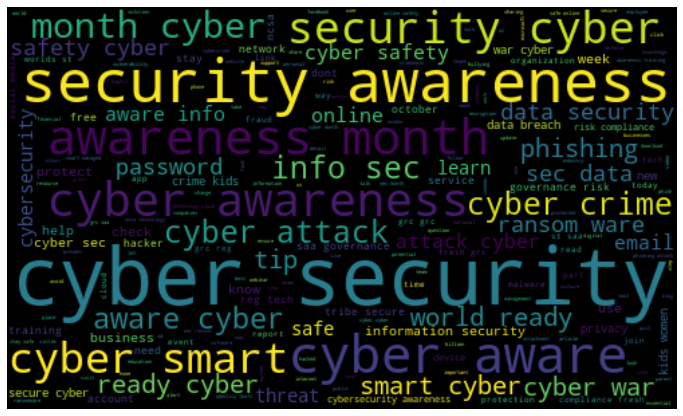

In [12]:
# Visualize by creating word cloud
allWords = ' '.join([text for text in tweet_df_cleanR3['description']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.figure(figsize=(12,8))
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [13]:
# # add most common words to stop words and update DTM
# # This step does not have to be done if not necessary 
# add_stop_words = [word for word, count in Counter(words).most_common() if count > 250]
# add_stop_words

In [14]:
# # add to original stop_words
# custom_stop_words + [x for x in add_stop_words if x not in custom_stop_words]

In [15]:
# pickle custom_stop_words
with open('custom_stop_words.pkl','wb') as custom_stop_words_pkl:
   pickle.dump(custom_stop_words,custom_stop_words_pkl)

In [16]:
# update DTM with the new list of stop words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text 

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

# Recreate DTM
tfidf = TfidfVectorizer(stop_words = stop_words,min_df = 2)
word_count=tfidf.fit_transform(tweet_df_cleanR3.description.tolist())
feature_names = tfidf.get_feature_names()
denselist = word_count.todense().tolist() # list of tf-idf values
dtm2 = pd.DataFrame(denselist, columns=feature_names)

In [17]:
dtm2

,able,abuse,access,accessed,according,account,accounts,achieve,acquisition,action,...,worried,worry,worship,worst,year,years,youre,youve,zaya,zero
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.223975,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
853,0.0,0.0,0.159412,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
854,0.0,0.0,0.000000,0.0,0.0,0.366157,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
855,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [18]:
# Round 4 of cleaning
def clean_Txt_r4(text):
    stop_words = STOPWORDS.union(custom_stop_words)
    tokenized = word_tokenize(text)
    filtered = [w for w in tokenized if not w in custom_stop_words]
    text = ' '.join(map(str, filtered))
    return text
round5 = lambda x: clean_Txt_r4(x)

In [19]:
tweet_df_cleanR4 = tweet_df_cleanR3.copy()
tweet_df_cleanR4.description = tweet_df_cleanR4.description.apply(round5)
tweet_df_cleanR4_SA = tweet_df_cleanR4.copy()

In [20]:
tweet_df_cleanR4_SA['subjectivity'] = tweet_df_cleanR4['description'].apply(getSubjectivity)
tweet_df_cleanR4_SA['polarity'] = tweet_df_cleanR4['description'].apply(getPolarity)

In [21]:
tweet_df_cleanR4_SA.head(30)

,author,description,subjectivity,polarity
0,ECAatState,today officially marks week evolve digital wor...,0.233333,-0.066667
1,JuliePerrine,creating strong passwords crucial measure that...,0.744444,0.311111
2,craziart,importance smaller steps assessment attack inf...,0.550000,-0.050000
3,CyberSecurityN8,true owner gives maximum protection registered...,0.650000,0.350000
5,R___83___O,want know consequences ransom ware attack busi...,0.600000,-0.100000
7,NebulaITUK,mfa helps accounts data secure love microsofts...,0.551515,0.345455
8,cybersec_feeds,speaking webinar nov landscape whats going sta...,0.000000,0.000000
9,aryannegi009,day tip stay secure part month,0.600000,0.400000
16,911CyberMarket,national alliance ncsa educating empowering gl...,0.416667,0.175000
17,GNYHA,hospitals health systems use hipaa rule toolki...,0.000000,0.000000


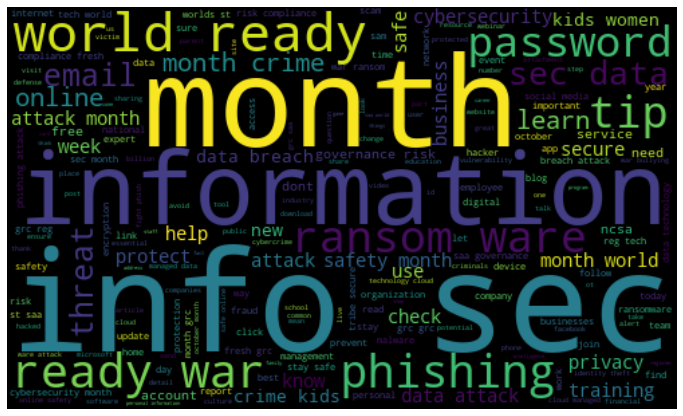

In [22]:
# Visualize by creating word cloud
allWords = ' '.join([text for text in tweet_df_cleanR4['description']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.figure(figsize=(12,8))
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [23]:
# Create a function to compute the very negative, negative, neutral,positive ,very positive analysis
# look into literature for thresholds for 3 and 5 categorizations
def getAnalysis(score):
    if score < 0: 
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [24]:
tweet_df_cleanR4_SA['analysis'] = tweet_df_cleanR4_SA['polarity'].apply(getAnalysis)
tweet_df_cleanR4_SA.head(30)

,author,description,subjectivity,polarity,analysis
0,ECAatState,today officially marks week evolve digital wor...,0.233333,-0.066667,negative
1,JuliePerrine,creating strong passwords crucial measure that...,0.744444,0.311111,positive
2,craziart,importance smaller steps assessment attack inf...,0.550000,-0.050000,negative
3,CyberSecurityN8,true owner gives maximum protection registered...,0.650000,0.350000,positive
5,R___83___O,want know consequences ransom ware attack busi...,0.600000,-0.100000,negative
7,NebulaITUK,mfa helps accounts data secure love microsofts...,0.551515,0.345455,positive
8,cybersec_feeds,speaking webinar nov landscape whats going sta...,0.000000,0.000000,neutral
9,aryannegi009,day tip stay secure part month,0.600000,0.400000,positive
16,911CyberMarket,national alliance ncsa educating empowering gl...,0.416667,0.175000,positive
17,GNYHA,hospitals health systems use hipaa rule toolki...,0.000000,0.000000,neutral


In [25]:
# Saving updated DTM, updated cleaned DF and sentiment analysis DF
dtm2.to_pickle('dtm2.pkl')
tweet_df_cleanR4.to_pickle('tweet_df_cleanR4.pkl')
tweet_df_cleanR4_SA.to_pickle('tweet_df_cleanR4_SA.pkl')

In [26]:
# print all of the positive tweets
n = 1 
sortedDF = tweet_df_cleanR4_SA.sort_values(by=['polarity'],ascending=False)
sortedDF.index = [j for j in range(0,sortedDF.shape[0])]
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['analysis'][i] == 'positive'):
        print(str(n) + ') ' + sortedDF['description'][i])
        print()
        n = n+1

1) best aqua cloud native ku berne tes

2) phishing simulations excellent training resource read article pro tips upgrade phishing simulations email phishing emails

3) best data loss prevention dlp software tools attack crime defense risk resilience information information

4) tips perfect desktop layout soothing ocean waves peace mind vpn app doesnt track data wi fi

5) kaiva tech great share video recorded phishing hope keeps month

6) great content jim stickleys missed pandemic

7) welcome week week dont miss weeks events month se cut

8) time year happy halloween jobs tiro

9) great article

10) great event week germany thank crime

11) happy monday week cybersecurity month week fight phish learn identify phishing attack always remember part cf phishing

12) month successfully completed bullying browser certification thank organizing month information sea skilling learn grow

13) thats wrap panel discussion csam loads information insights delivered session kudos team matrix succes

In [27]:
# print all of the neutral tweets
n = 1 
sortedDF = tweet_df_cleanR4_SA.sort_values(by=['polarity'],ascending=True)
sortedDF.index = [j for j in range(0,sortedDF.shape[0])]
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['analysis'][i] == 'neutral'):
        print(str(n) + ') ' + sortedDF['description'][i])
        print()
        n = n+1

1) month acquired training content platform acquisition allow create industrys training program delivered concierge service

2) dsph present annual event named damncon sponsored null trace mission change vision domain register damn null trace ctf events workshops skill development challenges ctf

3) public advisory advise public clicking suspicious email sent university emails bearing communications inc link email leads suspected phishing site advisory

4) importance keeping operating software uptodate understated comes protecting businesss network sage soph os support online developer software

5) harjinder singh takher partner risk advisory deloitte india shares views need cybersecurity data protection stay tuned insights part next powered people unravelling

6) keeping email account hacked heres need

7) bank america employee indicted email scam targeted businesses crime national risk intelligence

8) font lake malware strikes linux systems targeted attacks malware rootkit threat li

In [28]:
# print all of the negative tweets
n = 1 
sortedDF = tweet_df_cleanR4_SA.sort_values(by=['polarity'],ascending=True)
sortedDF.index = [j for j in range(0,sortedDF.shape[0])]
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['analysis'][i] == 'negative'):
        print(str(n) + ') ' + sortedDF['description'][i])
        print()
        n = n+1

1) know fight learn fight worst phishing attacks fight phish month phishing month ransom ware attacks

2) calling members defense industrial base check alert concerning apple zero day fix news alert

3) story must read dont base nft projects followers bought fact mermaid project derailed simp mermaids listed article

4) team feel owning clicking bad link watch video ecu irt month protect business

5) bullying dont send respond mean insulting messages tell parents receive one happens online makes feel uncomfortable talk parents teacher school safety month crime

6) thats dangerously close attacks minute month ca saa

7) never ignore updates popup inconvenient times capacity save hackers part information courtesy

8) ransom ware attacks brutal theyre complex everevolving read blog learn parts ransomware attack month se cut

9) almost use single password accounts tops list worst passwords use

10) beware fake loan apps alert

11) trust forward virus etc cybersecurity warnings receive coll

134) unprotected like open door viruses dont victim attacks think click ncsa

135) alarming state local civic tech fin tech marc arne au trudeau canadian pm ann cav ou kian alerts scam alert digital charter fp champagne

136) know recently released heres big deal sec data technology cloud managed data breach attack windows

137) watch national chairperson alyannah lagasca recently joined caravan communities promote mental health partner schools local government units

138) threat businesses continues evolve vital business suffers attack important know recover learn joining scotland webinar

139) programs fail achieve potential chris fleming join front lines tackle questions join chris leaders front lines october free online event

140) familiar social engineering common type attack hard spot youre prepared watch video criminals use psychological manipulation obtain private info email text stay

141) simply put phishing game moves scam mers play first trying trick play second theyve sen

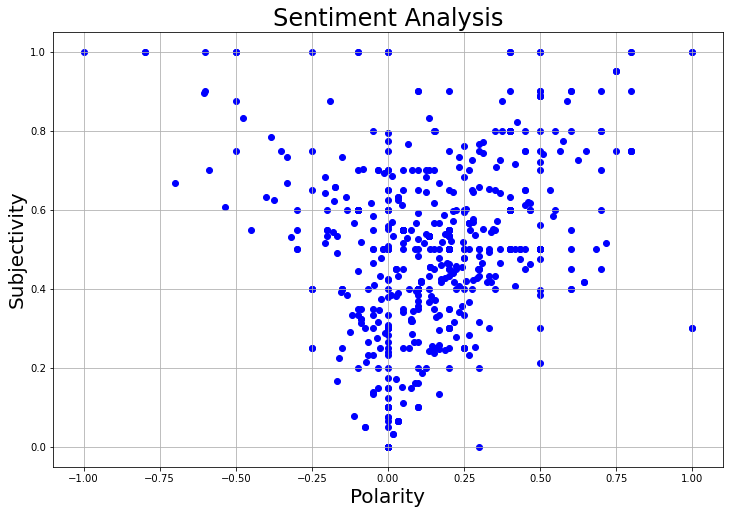

In [29]:
# plot the polarity and the subjectivity
tweet_df_cleanR4_SA.index = [j for j in range(0,sortedDF.shape[0])]

plt.figure(figsize=(12,8))
plt.scatter(tweet_df_cleanR4_SA['polarity'],tweet_df_cleanR4_SA['subjectivity'],color='Blue')
plt.title('Sentiment Analysis',fontsize=24)
plt.xlabel('Polarity',fontsize=20)
plt.ylabel('Subjectivity',fontsize=20)
plt.grid()
plt.show()

In [30]:
# find the percentage of positive tweets
ptweets = tweet_df_cleanR4_SA[tweet_df_cleanR4_SA.analysis == 'positive']
ptweets = ptweets.description
print("Percentage of positive tweets " + str(round(ptweets.shape[0]/tweet_df_cleanR4_SA.shape[0]*100,1)) + "%")

Percentage of positive tweets 52.9%


In [31]:
# find the percentage of neutral tweets
neutweets = tweet_df_cleanR4_SA[tweet_df_cleanR4_SA.analysis == 'neutral']
neutweets = neutweets.description
print("Percentage of neutral tweets " + str(round(neutweets.shape[0]/tweet_df_cleanR4_SA.shape[0]*100,1)) + "%")

Percentage of neutral tweets 29.9%


In [32]:
# find the percentage of negative tweets
negtweets = tweet_df_cleanR4_SA[tweet_df_cleanR4_SA.analysis == 'negative']
negtweets = negtweets.description
print("Percentage of negative tweets " + str(round(negtweets.shape[0]/tweet_df_cleanR4_SA.shape[0]*100,1)) + "%")

Percentage of negative tweets 17.3%


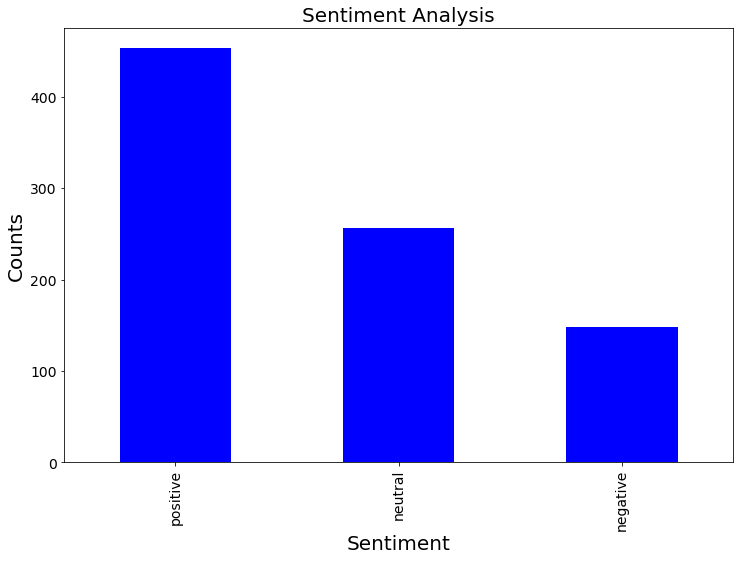

In [33]:
# Show the value counts 
tweet_df_cleanR4_SA['analysis'].value_counts()

# Plot and vsualize the counts
plt.figure(figsize=(12,8))
tweet_df_cleanR4_SA['analysis'].value_counts().plot(kind='bar',fontsize=14,color = "Blue")
plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('Sentiment',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()

## Optimizing for the best threshold for Positive and Negative Sentiments: 

We use the following to find the best threshold for Positive and Negative Sentiments: 

### Libraries that are used 

In [58]:
from sklearn.preprocessing import label_binarize
pd.set_option('display.max_colwidth', None) 

In [61]:
# Create a sample of the data
SA_sample_tweet_df = tweet_df_cleanR4_SA.sample(n=100, random_state = 42)
SA_sample_tweet_df.to_csv('SA_sample_tweet_df.csv', index=False)

In [36]:
# Manually label sample data on the analysis column'


In [37]:
sample_tweet_df[['is_neg', 'is_neutral', 'is_pos']] = pd.DataFrame(label_binarize(sample_tweet_df['analysis'], ['negative', 'neutral', 'positive']), index=sample_tweet_df.index)

sample_tweet_df.head(10)


/Users/aymanomar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=['negative', 'neutral', 'positive'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,author,description,subjectivity,polarity,analysis,is_neg,is_neutral,is_pos
536,BinaryTat,buy baby domain pros cons privacy,0.000000,0.000000,neutral,0,1,0
187,indiancyberops,communicate uncomfortable afraid tell parents ...,0.733333,-0.333333,negative,1,0,0
68,NetThing_au,week opportunity renew passwords update apps e...,0.433333,0.333333,positive,0,0,1
160,indiancyberops,always lock logout leaving safety month crime ...,0.000000,0.000000,neutral,0,1,0
689,HacWatch,data breaches caused human error cisco says co...,0.250000,0.050000,positive,0,0,1
458,Sooraj_Sathya,info sec data attack month worlds st saa gover...,0.416667,0.108333,positive,0,0,1
355,LoriMariePayne,define teentween uses device use contract free,0.800000,0.400000,positive,0,0,1
632,AgileWorldNews,october month together lets manage risks take ...,0.333333,0.166667,positive,0,0,1
19,manuel_sharath,lets talk practices follow comes drop comments...,0.000000,0.000000,neutral,0,1,0
34,KPMGIndia,poll cyberbullying tactic involves sharing emb...,0.500000,0.500000,positive,0,0,1


In [38]:
print(sample_tweet_df['is_neg'].value_counts(dropna=False),'\n\n')

print(sample_tweet_df['is_pos'].value_counts(dropna=False),'\n\n')

print(sample_tweet_df['is_neutral'].value_counts(dropna=False),'\n\n')

0    83
1    17
Name: is_neg, dtype: int64 


1    56
0    44
Name: is_pos, dtype: int64 


0    73
1    27
Name: is_neutral, dtype: int64 




In [39]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

In [40]:
# This function is based off of this example: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

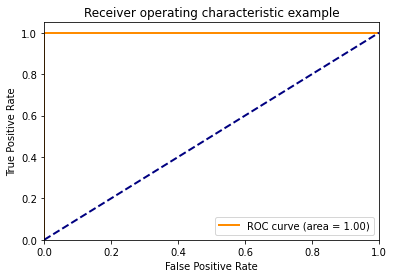

In [41]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve(sample_tweet_df['is_neg'], -sample_tweet_df['polarity'], pos_label=1)
neg_roc_auc = auc(neg_fpr, neg_tpr)

plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc)

In [42]:
for i, t in enumerate(neg_thresholds):
    neg_pred = -sample_tweet_df['polarity'] > t
    acc = accuracy_score(sample_tweet_df['is_neg'], neg_pred)
    print('threshold: {}, accuracy: {}'.format(-t, acc))

threshold: -1.6041666666666665, accuracy: 0.83
threshold: -0.6041666666666666, accuracy: 0.83
threshold: -0.5, accuracy: 0.84
threshold: -0.19166666666666662, accuracy: 0.89
threshold: -0.1, accuracy: 0.9
threshold: -0.06666666666666667, accuracy: 0.93
threshold: -0.05, accuracy: 0.95
threshold: -0.016666666666666663, accuracy: 0.99
threshold: 0.0, accuracy: 1.0
threshold: 0.04999999999999999, accuracy: 0.69
threshold: 0.05, accuracy: 0.68
threshold: 0.07678571428571429, accuracy: 0.62
threshold: 0.1, accuracy: 0.61
threshold: 0.125, accuracy: 0.57
threshold: 0.13333333333333333, accuracy: 0.56
threshold: 0.16666666666666666, accuracy: 0.5
threshold: 0.2, accuracy: 0.47
threshold: 0.25, accuracy: 0.42
threshold: 0.26666666666666666, accuracy: 0.41
threshold: 0.36666666666666664, accuracy: 0.33
threshold: 0.4, accuracy: 0.32
threshold: 0.4222222222222222, accuracy: 0.23
threshold: 0.5, accuracy: 0.22
threshold: 1.0, accuracy: 0.18


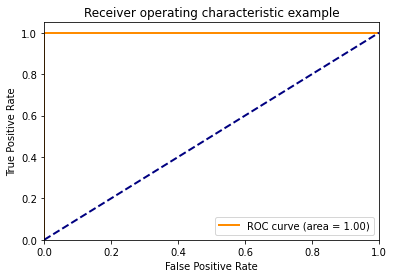

In [43]:
pos_fpr, pos_tpr, pos_thresholds = roc_curve(sample_tweet_df['is_pos'], sample_tweet_df['polarity'], pos_label=1)
pos_roc_auc = auc(pos_fpr, pos_tpr)

plot_roc_curve(pos_fpr, pos_tpr, pos_roc_auc)

In [44]:
for i, t in enumerate(pos_thresholds):
    pos_pred = sample_tweet_df['polarity'] > t
    acc = accuracy_score(sample_tweet_df['is_pos'], pos_pred)
    print('threshold: {}, accuracy: {}'.format(t, acc))

threshold: 2.0, accuracy: 0.44
threshold: 1.0, accuracy: 0.44
threshold: 0.5, accuracy: 0.45
threshold: 0.4166666666666667, accuracy: 0.5
threshold: 0.4, accuracy: 0.51
threshold: 0.2681818181818182, accuracy: 0.65
threshold: 0.26666666666666666, accuracy: 0.66
threshold: 0.225, accuracy: 0.71
threshold: 0.19999999999999998, accuracy: 0.74
threshold: 0.16666666666666666, accuracy: 0.76
threshold: 0.13333333333333333, accuracy: 0.77
threshold: 0.10000000000000002, accuracy: 0.85
threshold: 0.1, accuracy: 0.86
threshold: 0.06818181818181818, accuracy: 0.89
threshold: 0.05, accuracy: 0.9
threshold: 0.012121212121212116, accuracy: 0.99
threshold: 0.0, accuracy: 1.0
threshold: -0.049999999999999996, accuracy: 0.72
threshold: -0.05, accuracy: 0.71
threshold: -0.06666666666666667, accuracy: 0.68
threshold: -0.1, accuracy: 0.66
threshold: -0.3333333333333333, accuracy: 0.61
threshold: -0.5, accuracy: 0.6
threshold: -0.6041666666666666, accuracy: 0.57
